In [23]:
from IPython.display import Image
Image(filename='Gaussian-Equation.png')

IOError: [Errno 2] No such file or directory: u'Gaussian-Equation.png'

In [11]:
xTest = input('select a test point on range 1-8 : ') # [-2 10]

select a test point : 4


In [16]:
KXXtest = np.zeros((len(xvals[0]),1))

def generateKXXtest():
    for xi in range (0, len(KXXtest), 1): 
        KXXtest[xi,0] = xvals[0][xi] * xTest
        
generateKXXtest()
KXXtest # Nothing is on diagonol. Thus add no noise

array([[  4.],
       [ 12.],
       [ 20.],
       [ 24.],
       [ 28.],
       [ 32.]])

In [34]:
KXtestX = np.zeros((1,len(xvals[0])))

def generateKXtestX():
    for xi in range (0, len(xvals[0]), 1): 
        KXtestX[0,xi] = xvals[0][xi] * xTest
        
generateKXtestX()
KXtestX # Nothing is on diagonol. Thus add no noise

array([[  4.,  12.,  20.,  24.,  28.,  32.]])

In [4]:
KXX = np.zeros((len(xvals[0]), len(xvals[0])))

def generateKXX():
    for xi in range (0, len(KXX), 1): 
        for xj in range (0, len(KXX), 1):
            KXX[xi,xj] = xvals[0][xi] * xvals[0][xj] #np.dot(a,b)
       
generateKXX()
KXX # Add noise to this # Add 5 (or whatever the noise is) to everything on diagonol 

array([[  1.,   3.,   5.,   6.,   7.,   8.],
       [  3.,   9.,  15.,  18.,  21.,  24.],
       [  5.,  15.,  25.,  30.,  35.,  40.],
       [  6.,  18.,  30.,  36.,  42.,  48.],
       [  7.,  21.,  35.,  42.,  49.,  56.],
       [  8.,  24.,  40.,  48.,  56.,  64.]])

In [29]:
KxTestxTest = xTest * xTest
KxTestxTest # add noise to this 

16

In [38]:
#the mean in this case is 0
Y = np.transpose(yvals)
Y

array([[ 0.84147098],
       [ 0.14112001],
       [-0.95892427],
       [-0.2794155 ],
       [ 0.6569866 ],
       [ 0.98935825]])

In [44]:
# MuPrime = 1x6 6x6 6x1
import scipy.linalg as la
muPrime = np.dot(np.dot(KXtestX, la.pinv(KXX)), Y)
muPrime # Heights 

array([[ 0.15885845]])

In [49]:
sigmaPrime = KxTestxTest - KXtestX.dot(la.pinv(KXX)).dot(KXXtest)
sigmaPrime[0][0] # sigma prime is the variance 

0.0

In [22]:
Image(filename='Gaussian-Equation2.png')

NameError: name 'Image' is not defined

#BEGINING 

In [1]:
#Adding Noise
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline 

In [23]:
#putting it all together and graphing it
xvals = np.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )
yvals = np.sin( xvals )
testPoints = np.linspace(0, 10, 200, endpoint=True)

In [24]:
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
    
def initialize():
    KXX = np.zeros((len(xvals[0]), len(xvals[0])))
    KXTest = np.zeros((len(xvals[0]),1))
    KTestX = np.zeros((1,len(xvals[0])))
    KTestTest = 0
    Y = np.transpose(yvals)
    yOutputs = []
    yVariances = []

In [25]:
def generateKXTest(testPoint):
    for xi in range (0, len(KXTest), 1): 
        KXTest[xi,0] = xvals[0][xi] * testPoint     
        
def generateKTestX(testPoint):
    for xi in range (0, len(xvals[0]), 1): 
        KTestX[0,xi] = xvals[0][xi] * testPoint
        
def generateKTestTest(testPoint, noise):
    return testPoint * testPoint + noise

def generateKXX(noise):
    for xi in range (0, len(KXX), 1): 
        for xj in range (0, len(KXX), 1):
            KXX[xi,xj] = xvals[0][xi] * xvals[0][xj] + noise
            

In [26]:
#Initialize
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
upperBound = []
lowerBound = []

In [27]:
def generateResults(noise):
    generateKXX(noise) #will remain for all test Points
    for val in testPoints: 
        generateKXTest(val)
        generateKTestX(val)
        KTestTest = generateKTestTest(val, noise)
        muPrime = np.dot(np.dot(KTestX, la.pinv(KXX)), Y)
        yOutputs.append(muPrime[0][0])
        sigmaPrime = KTestTest - KTestX.dot(la.pinv(KXX)).dot(KXTest)[0][0]
        yVariances.append(sigmaPrime)
        
generateResults(0.0)

1
1
200
200
200
200


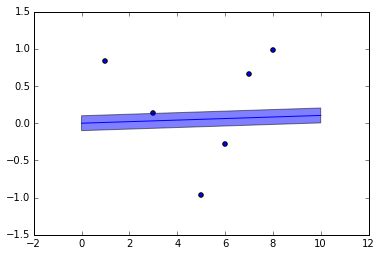

In [28]:
#print len ()

for i in range (0, len(yVariances), 1):
    upperBound.append(abs(yVariances[i]) + yOutputs)
    
for i in range (0, len(yVariances), 1):
    lowerBound.append(yOutputs- abs(yVariances[i]))

print len(xvals)
print len(yvals)
print len(testPoints)
print len(yOutputs)
print len(upperBound[0])
print len(lowerBound[0])

    
plt.scatter(xvals,yvals)
plt.plot(testPoints,yOutputs)
plt.gca().fill_between(testPoints, upperBound[0], lowerBound[0], alpha =.5)
plt.show()